# Phase-I Pixel detector: Efficiency measurements using the first collisions

The purpose of this notebook and presentation is to provide documentation and validation of the efficiency measurements.

<div style="margin-top: 20px; display: inline-block;"><a href="mailto:adam.hunyadi@cern.ch?Subject=Phase-I%20Pixel detector:%20Efficiency%20Measurements" target="_top">adam.hunyadi@cern.ch</div>
<div style="margin-left: 30px; margin-right: 30px; display: inline;">- - -</div>
<div style="display: inline;">2017. 05. 17.</div>

## Tools used
The PhaseIPixelNtuplizer package (used to process the CMSSW output) is available at:

https://github.com/jkarancs/PhaseIPixelNtuplizer

The PhaseIEfficiencyPlotter package (used to create plots) is available at:

https://github.com/hunyadix/PhaseIEfficiencyPlotter

In [1]:
import ROOT, sys
ROOT.gStyle.SetPalette(1)
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_delayscan_with_bad_ROC_exclusion.root", "READ")

In [2]:
DELAY_PLOTS_NUM_BINS   = 8
DELAY_PLOTS_LOWER_EDGE = 162
DELAY_PLOTS_UPPER_EDGE = 163.6
labelsWBC = [
    "WBC162:++0ns",
    "WBC163:++20ns",
    "WBC163:++15ns",
    "WBC163:++10ns",
    "WBC163:++5ns",
    "WBC163:++0ns",
    "WBC164:++20ns",
    "WBC164:++15ns",
    "WBC164:++10ns",
    "WBC164:++5ns"
]
Y_AXIS_DIVISIONS = 1005
EFFICIENCY_LOWER_EDGE = 0.0
EFFICIENCY_UPPER_EDGE = 1.2

## Validation - List of delay scenarios
The Ntuple should contain plots listed in different directories. Each of these directories should correspont to a delay scenario. This code prints out the delay scenarios:


In [3]:
for key in ROOT.gDirectory.GetListOfKeys():
    print key.GetTitle()

Delay_-9999.00
Delay_4044.00
Delay_4069.00
Delay_4094.00
Delay_4032.00
Delay_4057.00
Delay_4082.00
Delay_4107.00
Delay_4100.00
Delay_4050.00
Delay_4088.00
Delay_4063.00
Delay_4075.00
Delay_4047.00
Delay_4054.00
Delay_4060.00
Delay_4066.00
Delay_4072.00
Delay_4079.00
Delay_4085.00
Delay_4097.00
Cluster_size_X_vs_delay
Cluster_size_Y_vs_delay
Cluster_total_size_vs_delay
Cluster_charge_vs_delay
Efficiency_vs_delay


The delay scenarios should have been printed out ("Delay -9999.00" is saved for unknown delay scenarios or simulations). 

In [4]:
mainDir = ROOT.gDirectory.Get("Efficiency_vs_delay/Graphs")
for index, directory in enumerate(mainDir.GetListOfKeys()): 
    sys.stdout.write("[ %s ] " % directory.GetTitle())

[ BpixFpix ] [ LayersNegativePositive ] [ DisksInnerOuter ] [ LayerDetailed ] 

## Validation - Plots

### Efficiency vs delay on the barrel and forward regions

In [5]:
def getGraph(efficiencyHistogram, markerColor, markerStyle):
    xAxis = efficiencyHistogram.GetXaxis()
    yAxis = efficiencyHistogram.GetYaxis()
    numBins = xAxis.GetNbins()
    valuesX     = ROOT.vector("double")()
    valuesY     = ROOT.vector("double")()
    numZeroBins = 0
    for bin in range(numBins):
       if(efficiencyHistogram.GetBinContent(bin + 1) == 0):
          numZeroBins = numZeroBins + 1
          continue
       valuesX.push_back(xAxis.GetBinCenter(bin + 1))
       valuesY.push_back(efficiencyHistogram.GetBinContent(bin + 1))
    graph = ROOT.TGraph(numBins - numZeroBins, valuesX.data(), valuesY.data())
    graph.SetTitle(efficiencyHistogram.GetTitle())
    graph.GetXaxis().SetTitle(xAxis.GetTitle())
    graph.GetYaxis().SetTitle(yAxis.GetTitle())
    graph.GetXaxis().SetTitleSize(xAxis.GetTitleSize())
    graph.GetYaxis().SetTitleSize(yAxis.GetTitleSize())
    graph.GetXaxis().SetTitleOffset(xAxis.GetTitleOffset())
    graph.GetYaxis().SetTitleOffset(yAxis.GetTitleOffset())
    graph.GetXaxis().SetTitleFont(xAxis.GetTitleFont())
    graph.GetYaxis().SetTitleFont(yAxis.GetTitleFont())
    graph.GetXaxis().SetRangeUser (xAxis.GetXmin(), xAxis.GetXmax())
    graph.GetXaxis().SetNdivisions(xAxis.GetNdivisions())
    graph.GetYaxis().SetNdivisions(yAxis.GetNdivisions())
    graph.GetXaxis().SetLabelOffset(xAxis.GetLabelOffset())
    graph.GetYaxis().SetLabelOffset(yAxis.GetLabelOffset())
    graph.SetMarkerColor(markerColor)
    graph.SetFillColor(markerColor)
    graph.SetMarkerStyle(markerStyle)
    graph.SetLineWidth(1)
    graph.SetLineStyle(1)
    graph.SetMarkerSize(0.8)
    return graph

In [6]:
def resetCanvasMargins(canvas):
    canvas.SetLeftMargin(0.1)
    canvas.SetRightMargin(0.1)
    canvas.SetBottomMargin(0.1)
    canvas.SetTopMargin(0.1)

def createOverlayingPadPair(firstPadName, secondPadName):
    p1 = ROOT.TPad(firstPadName, "", 0, 0, 1, 1)
    p1.SetGrid()
    p2 = ROOT.TPad(secondPadName, "", 0, 0, 1, 1)
    p2.SetFillStyle(4111)
    p1.SetBottomMargin(0.22)
    p1.Draw()
    return (p1, p2)

def setupXAxis(graph):
    graph.GetXaxis().SetLabelOffset(0.0)
    graph.GetXaxis().SetTitleOffset(3.3)
    graph.GetXaxis().Set(DELAY_PLOTS_NUM_BINS, DELAY_PLOTS_LOWER_EDGE, DELAY_PLOTS_UPPER_EDGE)
    graph.GetXaxis().SetNdivisions(-500 - DELAY_PLOTS_NUM_BINS)
    graph.GetXaxis().CenterTitle()
    for numBin in range(len(labelsWBC)):
        graph.GetXaxis().ChangeLabel(numBin + 1, 60, 0.020, 32, -1, -1, labelsWBC[numBin])
    
def setupMainYAxis(graph, title, lowerEdge, upperEdge):
    graph.GetYaxis().SetTitle(title)
    graph.GetYaxis().SetLabelSize(0.035)
    graph.GetYaxis().SetLabelFont(42)
    graph.GetYaxis().SetRangeUser(lowerEdge, upperEdge)
    graph.GetYaxis().SetNdivisions(-Y_AXIS_DIVISIONS)
    graph.GetYaxis().SetTitleFont(42)
    graph.GetYaxis().CenterTitle()
    graph.GetYaxis().SetTitleOffset(1.2)
    
def getSecondaryYAxis(yMin, yMax):
    secondaryAxis = ROOT.TGaxis(DELAY_PLOTS_UPPER_EDGE, yMin, DELAY_PLOTS_UPPER_EDGE, yMax, 0, 1.2, 50510, "+L")
    secondaryAxis.SetTitle("Hit Efficiency") 
    secondaryAxis.SetLabelOffset(0.012)
    secondaryAxis.SetLabelSize(0.035)
    secondaryAxis.SetTextFont(42)
    secondaryAxis.SetLabelFont(42)
    secondaryAxis.SetLabelColor(ROOT.kBlue)
    secondaryAxis.SetTitleColor(ROOT.kBlue)
    secondaryAxis.SetLineColor(ROOT.kBlue)
    secondaryAxis.CenterTitle()
    return secondaryAxis

def drawSecondGraph(p1, p2, graph):
    xmin = DELAY_PLOTS_LOWER_EDGE;
    xmax = DELAY_PLOTS_UPPER_EDGE;
    dx = (xmax - xmin) / 0.8;
    ymin = 0.0;
    ymax = 1.2;
    dy = (ymax - ymin) / (1.0 - p1.GetBottomMargin() - p1.GetTopMargin());
    p2.Range(xmin - 0.1 * dx, ymin - p1.GetBottomMargin() * dy, xmax + 0.1 * dx, ymax + p1.GetTopMargin() * dy)
    p2.Draw()
    p2.cd()
    graph.Draw("P0")
    ROOT.gPad.Update()

In [7]:
canvas = ROOT.TCanvas("bpixCanvas")
graph = ROOT.TMultiGraph("FpixBpix", "Efficiency vs delay on BPix;delay(WBC setting + ns)")
clusterHisto = ROOT.gDirectory.Get("Cluster_total_size_vs_delay").Get("delayVsClusterSizePixelsBPix")
clusterHistoAsGraph = getGraph(clusterHisto, 2, 23)
efficiencyAsGraph = mainDir.Get("BpixFpix").Get("delayVsEfficiencyBPixAsGraph") 
# Creating the first graph
graph.Add(clusterHistoAsGraph)
# Set up canvas margins
resetCanvasMargins(canvas)
# Creating two overlaying TPads
p1, p2 = createOverlayingPadPair("autoP1", "autoP2")
p1.cd()
# Drawing the first graph
graph.Draw("0AP")
ROOT.gPad.Update()
# Styling the range-axis
setupXAxis(graph)
# Styling the first value axis
setupMainYAxis(graph, "Avg. cluster size", 3.0, 5.0)
# Creating and styling the second value axis
secondaryAxis = getSecondaryYAxis(3.0, 5.0)
secondaryAxis.Draw()
# Drawing the second graph
drawSecondGraph(p1, p2, efficiencyAsGraph)
#canvas.BuildLegend(0.15, 0.50, 0.40, 0.70, "", "P");

Info in <TCanvas::Print>: eps file plots/bpixCanvas.eps has been created


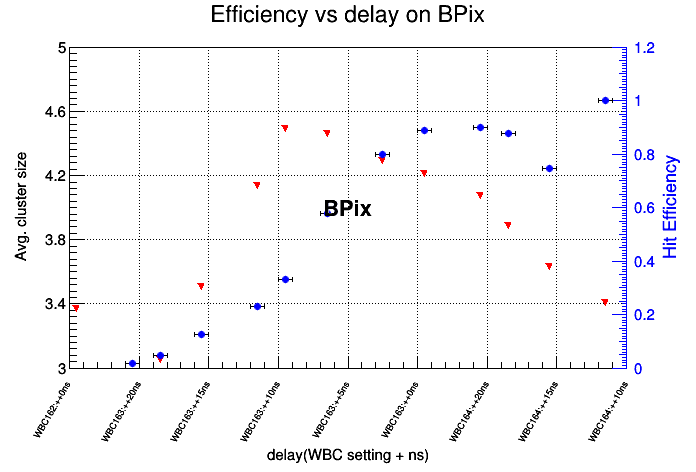

In [8]:
canvas.Draw()
label = ROOT.TLatex()
label.SetTextAlign(22)
label.DrawLatexNDC(0.50 + p1.GetRightMargin() / 2 - p1.GetLeftMargin() / 2, 0.5 + p1.GetBottomMargin() / 2 - p1.GetTopMargin() / 2, "BPix");
canvas.SaveAs("plots/" + canvas.GetName() + ".eps")

In [9]:
canvas = ROOT.TCanvas("fpixCanvas")
graph = ROOT.TMultiGraph("FpixBpix", "Efficiency vs delay on FPix;delay(WBC setting + ns)")
clusterHisto = ROOT.gDirectory.Get("Cluster_total_size_vs_delay").Get("delayVsClusterSizePixelsFPix")
clusterHistoAsGraph = getGraph(clusterHisto, 2, 23)
efficiencyAsGraph = mainDir.Get("BpixFpix").Get("delayVsEfficiencyFPixAsGraph") 
# Creating the first graph
graph.Add(clusterHistoAsGraph)
# Set up canvas margins
resetCanvasMargins(canvas)
# Creating two overlaying TPads
p1, p2 = createOverlayingPadPair("autoP1", "autoP2")
p1.cd()
# Drawing the first graph
graph.Draw("0AP")
ROOT.gPad.Update()
# Styling the range-axis
setupXAxis(graph)
# Styling the first value axis
setupMainYAxis(graph, "Avg. cluster size", 3.0, 5.0)
# Creating and styling the second value axis
secondaryAxis = getSecondaryYAxis(3.0, 5.0)
secondaryAxis.Draw()
# Drawing the second graph
drawSecondGraph(p1, p2, efficiencyAsGraph)

Info in <TCanvas::Print>: eps file plots/fpixCanvas.eps has been created


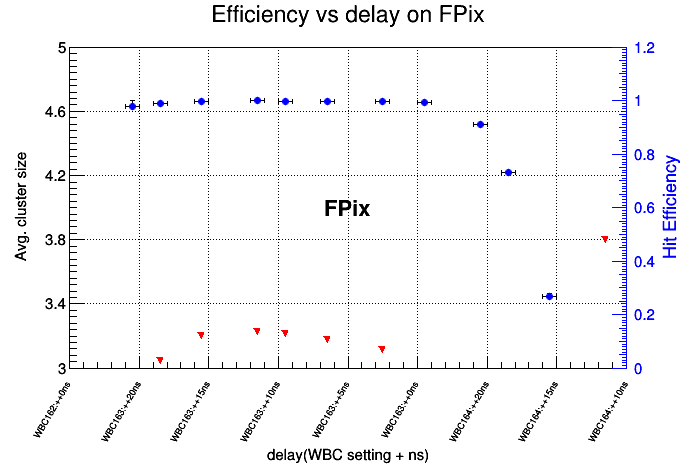

In [10]:
canvas.Draw()
label = ROOT.TLatex()
label.SetTextAlign(22)
label.DrawLatexNDC(0.50 + p1.GetRightMargin() / 2 - p1.GetLeftMargin() / 2, 0.5 + p1.GetBottomMargin() / 2 - p1.GetTopMargin() / 2, "FPix");
canvas.SaveAs("plots/" + canvas.GetName() + ".eps")

<center><h2> Efficiency vs delay on the barrel - sides of layers</h2></center>

In [11]:
canvases = [None] * 2
graphs   = [None] * 2
efficiencyGraphNames = [
    [
        "delayVsEfficiencyLayer1NegativeAsGraph",
        "delayVsEfficiencyLayer2NegativeAsGraph",
        "delayVsEfficiencyLayer3NegativeAsGraph",
        "delayVsEfficiencyLayer4NegativeAsGraph"],
    [
        "delayVsEfficiencyLayer1PositiveAsGraph",
        "delayVsEfficiencyLayer2PositiveAsGraph",
        "delayVsEfficiencyLayer3PositiveAsGraph",
        "delayVsEfficiencyLayer4PositiveAsGraph"]]
canvases[0] = ROOT.TCanvas("LayersNegativeCanvas")
canvases[1] = ROOT.TCanvas("LayersPositiveCanvas")
graphs[0] = ROOT.TMultiGraph("LayersNegative", 
    "Efficiency vs delay on layers - negative side;delay(WBC setting + ns);efficiency")
graphs[1] = ROOT.TMultiGraph("LayersPositive", 
    "Efficiency vs delay on layers - positive side;delay(WBC setting + ns);efficiency")
for graphIndex, graphNames in enumerate(efficiencyGraphNames):
    for markerIndex, graphName in enumerate(graphNames):
        graph = ROOT.TGraphAsymmErrors(mainDir.Get("LayersNegativePositive").Get(graphName))
        graph.SetMarkerColor(1 + markerIndex)
        graph.SetMarkerStyle(20 + markerIndex)
        graphs[graphIndex].Add(graph)
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    canvases[graphIndex].SetGrid()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    setupXAxis(graphs[graphIndex])
    setupMainYAxis(graphs[graphIndex], "Hit Efficiency", EFFICIENCY_LOWER_EDGE, EFFICIENCY_UPPER_EDGE)
    graphs[graphIndex].GetYaxis().SetNdivisions(-1005)
    legend = canvases[graphIndex].BuildLegend(0.12, 0.63, 0.55, 0.88, "", "P")
    #legend.SetBorderSize(0);
    #legend.SetFillColorAlpha(10, 0.1);

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

Info in <TCanvas::Print>: eps file plots/LayersNegativeCanvas.eps has been created


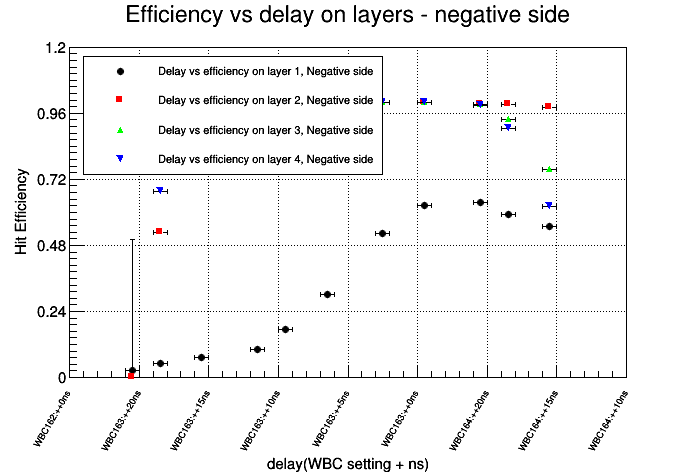

In [12]:
canvases[0].Draw()
canvases[0].SaveAs("plots/" + canvases[0].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/LayersPositiveCanvas.eps has been created


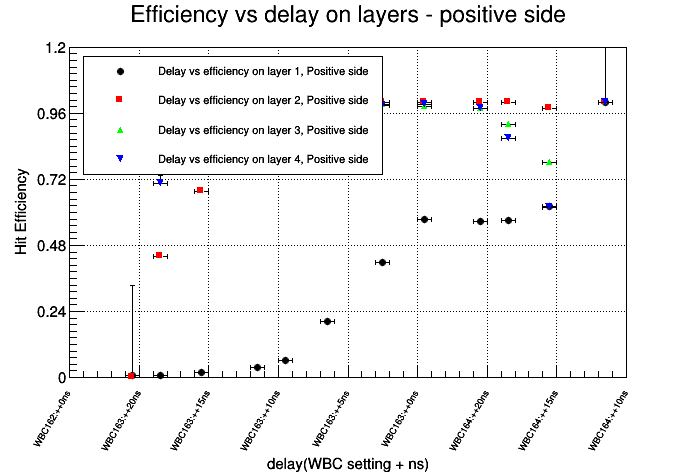

In [13]:
canvases[1].Draw()
canvases[1].SaveAs("plots/" + canvases[1].GetName() + ".eps")

<center><h2> Efficiency vs delay on the disks - inner and outer rings on  both endcaps</h2></center>

In [14]:
canvases = [None] * 4
graphs   = [None] * 4
efficiencyGraphNames = [
    [
        "delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph",
        "delayVsEfficiencyDisk2NegativeSideInnerRingAsGraph",
        "delayVsEfficiencyDisk3NegativeSideInnerRingAsGraph"],
    [
        "delayVsEfficiencyDisk1NegativeSideOuterRingAsGraph",
        "delayVsEfficiencyDisk2NegativeSideOuterRingAsGraph",
        "delayVsEfficiencyDisk3NegativeSideOuterRingAsGraph"],
    [
        "delayVsEfficiencyDisk1PositiveSideInnerRingAsGraph",
        "delayVsEfficiencyDisk2PositiveSideInnerRingAsGraph",
        "delayVsEfficiencyDisk3PositiveSideInnerRingAsGraph"],
    [
        "delayVsEfficiencyDisk1PositiveSideOuterRingAsGraph",
        "delayVsEfficiencyDisk2PositiveSideOuterRingAsGraph",
        "delayVsEfficiencyDisk3PositiveSideOuterRingAsGraph"]]
canvases[0] = ROOT.TCanvas("InnerRingsNegativeCanvas")
canvases[1] = ROOT.TCanvas("OuterRingsNegativeCanvas")
canvases[2] = ROOT.TCanvas("InnerRingsPositiveCanvas")
canvases[3] = ROOT.TCanvas("OuterRingsPositiveCanvas")
graphs[0] = ROOT.TMultiGraph("InnerRingsNegative", 
    "Efficiency vs delay on inner rings - negative side;delay(WBC setting + ns);efficiency")
graphs[1] = ROOT.TMultiGraph("OuterRingsNegative", 
    "Efficiency vs delay on outer rings - negative side;delay(WBC setting + ns);efficiency")
graphs[2] = ROOT.TMultiGraph("InnerRingsPositive", 
    "Efficiency vs delay on inner rings - positive side;delay(WBC setting + ns);efficiency")
graphs[3] = ROOT.TMultiGraph("OuterRingsPositive", 
    "Efficiency vs delay on outer rings - positive side;delay(WBC setting + ns);efficiency")
for graphIndex, graphNames in enumerate(efficiencyGraphNames):
    for markerIndex, graphName in enumerate(graphNames):
        graph = ROOT.TGraphAsymmErrors(mainDir.Get("DisksInnerOuter").Get(graphName))
        graph.SetMarkerColor(1 + markerIndex)
        graph.SetMarkerStyle(20 + markerIndex)
        graphs[graphIndex].Add(graph)
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    canvases[graphIndex].SetGrid()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    setupXAxis(graphs[graphIndex])
    setupMainYAxis(graphs[graphIndex], "Hit Efficiency", 0.0, 1.2)
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.020, 32, -1, -1, labelsWBC[numBin])
    canvases[graphIndex].BuildLegend(0.14, 0.38, 0.57, 0.58, "", "P")

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

Info in <TCanvas::Print>: eps file plots/InnerRingsNegativeCanvas.eps has been created


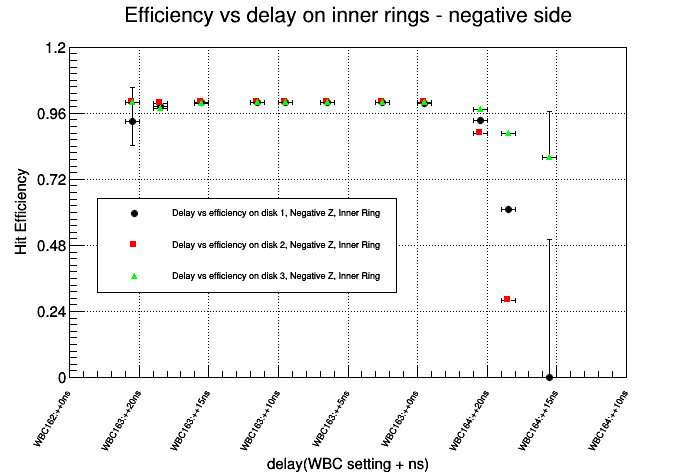

In [15]:
canvases[0].Draw()
canvases[0].SaveAs("plots/" + canvases[0].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/OuterRingsNegativeCanvas.eps has been created


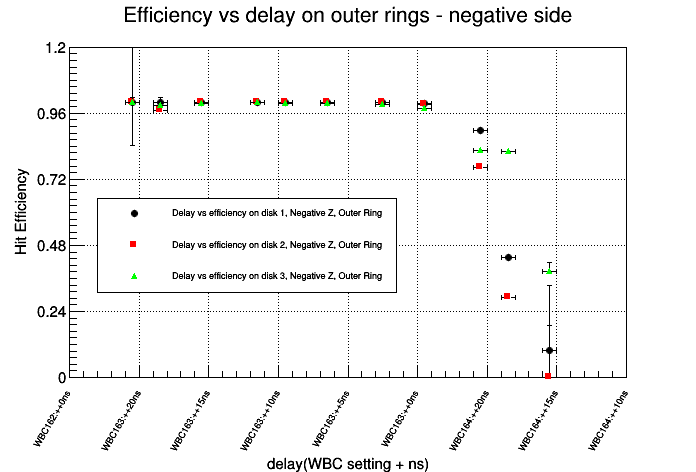

In [18]:
canvases[1].Draw()
canvases[1].SaveAs("plots/" + canvases[1].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/InnerRingsPositiveCanvas.eps has been created


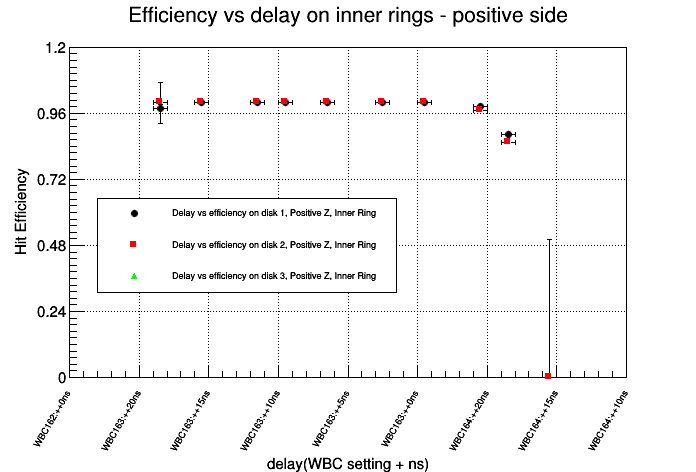

In [19]:
canvases[2].Draw()
canvases[2].SaveAs("plots/" + canvases[2].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/OuterRingsPositiveCanvas.eps has been created


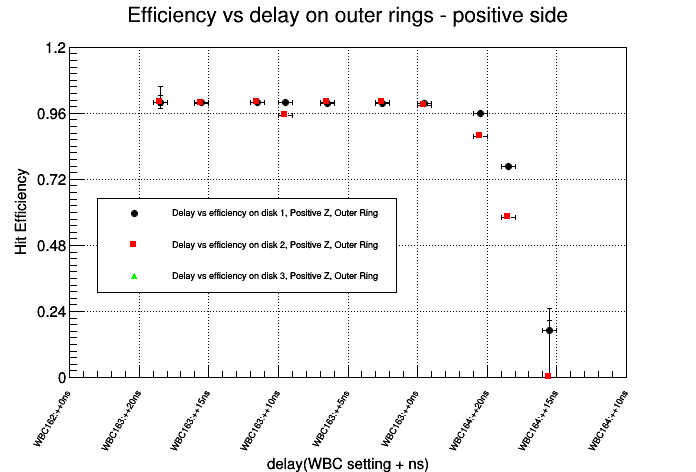

In [21]:
canvases[3].Draw()
canvases[3].SaveAs("plots/" + canvases[3].GetName() + ".eps")

## Efficiency vs delay on the barrel - sectors of half shells on both sides

In [46]:
canvases              = [None] * 8
graphs                = [None] * 8
sideStrings           = ["Negative", "Positive"]
layerPairStrings      = ["1 and 2", "3 and 4"]
layerPairStringsShort = ["1and2", "3and4"]
markerStyles          = [20, 21, 22, 23, 29, 33, 34, 3]
for index in range(64):
    side                   = index / 32
    halfShell              = (index - side * 32) / 16
    layerPair              = (index - side * 32 - halfShell * 16) / 8
    sec                    = index % 8
    sideAsString           = sideStrings[side - 1]
    secAsString            = str(sec + 1)
    halfShellAsString      = sideStrings[halfShell - 1]
    layerPairAsString      = layerPairStrings[layerPair - 1]
    layerPairAsShortString = layerPairStringsShort[layerPair - 1]
    graphIndex             = side * 4 + halfShell * 2 + layerPair
    if sec == 0: 
        canvases[graphIndex] = ROOT.TCanvas(sideAsString.lower() + "Z" + halfShellAsString + "XShellLayers" + layerPairAsShortString + "canvas")
        graphs[graphIndex]   = ROOT.TMultiGraph(sideAsString.lower() + "Z" + halfShellAsString + "Layers" + layerPairAsShortString, 
            "Efficiency vs delay on sectors - " + sideAsString.lower() + " Z, " + halfShellAsString.lower() + " X shell, layers " + layerPairAsString + ";delay(WBC setting + ns);efficiency")
    graph = ROOT.TGraphAsymmErrors(mainDir.Get("LayerDetailed").Get("delayVsEfficiency" + sideAsString + "Z" + halfShellAsString + "XShellSector" + secAsString + "Layers" + layerPairAsShortString + "AsGraph"))
    graph.SetTitle(graph.GetTitle()[35:-5])
    graph.SetMarkerColor(1 + index % 8)
    graph.SetMarkerStyle(markerStyles[index % 8])
    graphs[graphIndex].Add(graph)
for graphIndex in range(len(graphs)):
    graphs[graphIndex].SetTitle("Efficiency vs delay on sectors")
    canvases[graphIndex].cd()
    canvases[graphIndex].SetGrid()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    graphs[graphIndex].GetXaxis().SetLabelOffset(0.0)
    graphs[graphIndex].GetXaxis().CenterTitle()
    graphs[graphIndex].GetXaxis().SetTitleOffset(3.3)
    graphs[graphIndex].GetXaxis().Set(DELAY_PLOTS_NUM_BINS, DELAY_PLOTS_LOWER_EDGE, DELAY_PLOTS_UPPER_EDGE)
    graphs[graphIndex].GetXaxis().SetNdivisions(-DELAY_PLOTS_NUM_BINS)
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.020, 32, -1, -1, labelsWBC[numBin])
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.018, -1, -1, -1, labelsWBC[numBin])
    legend = canvases[graphIndex].BuildLegend(0.22, 0.68, 0.88, 0.88, "", "P")
    legend.SetNColumns(2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: positiveZPositiveXShellLayers3and4canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: positiveZPositiveXShellLayers1and2canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: positiveZNegativeXShellLayers3and4canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: positiveZNegativeXShellLayers1and2canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: negativeZPositiveXShellLayers3and4canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: negativeZPositiveXShellLayers1and2canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: negativeZNegativeXShellLayers3and4canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: negativeZNegativeXShellLayers1and2canvas


<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

Info in <TCanvas::Print>: eps file plots/positiveZPositiveXShellLayers3and4canvas.eps has been created


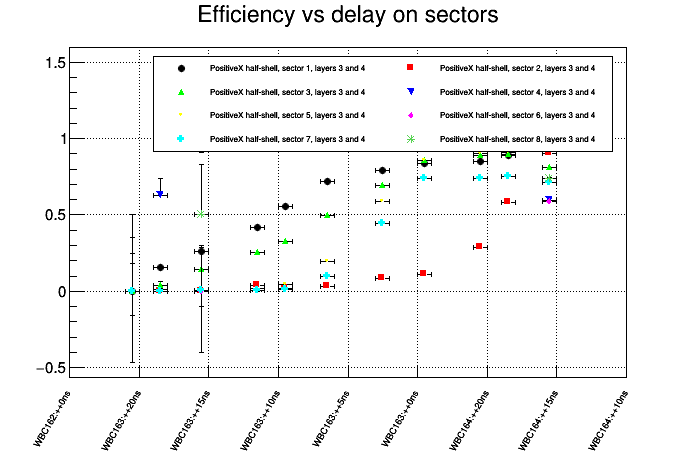

In [47]:
canvases[0].Draw()
canvases[0].SaveAs("plots/" + canvases[0].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/positiveZPositiveXShellLayers1and2canvas.eps has been created


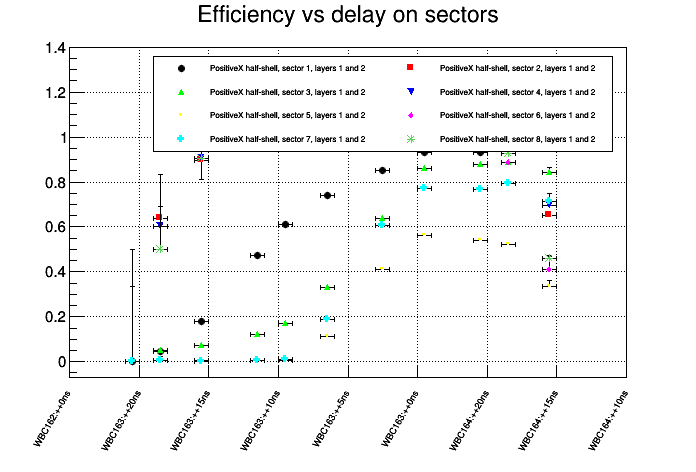

In [48]:
canvases[1].Draw()
canvases[1].SaveAs("plots/" + canvases[1].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/positiveZNegativeXShellLayers3and4canvas.eps has been created


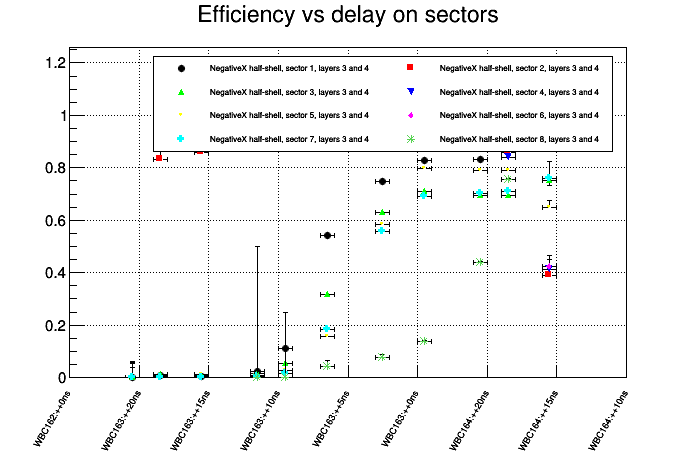

In [49]:
canvases[2].Draw()
canvases[2].SaveAs("plots/" + canvases[2].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/positiveZNegativeXShellLayers1and2canvas.eps has been created


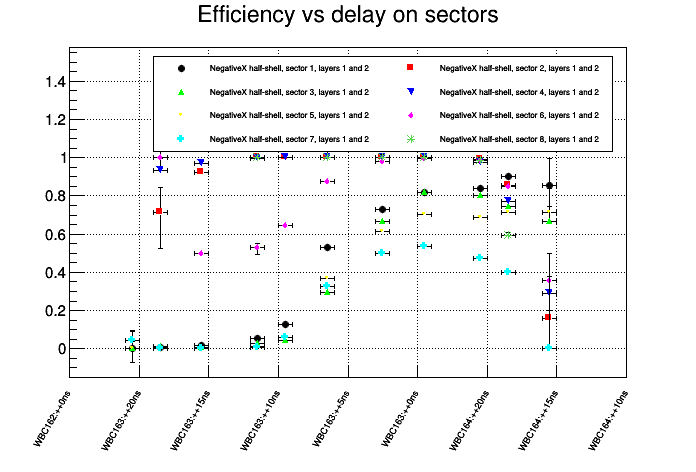

In [50]:
canvases[3].Draw()
canvases[3].SaveAs("plots/" + canvases[3].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/negativeZPositiveXShellLayers3and4canvas.eps has been created


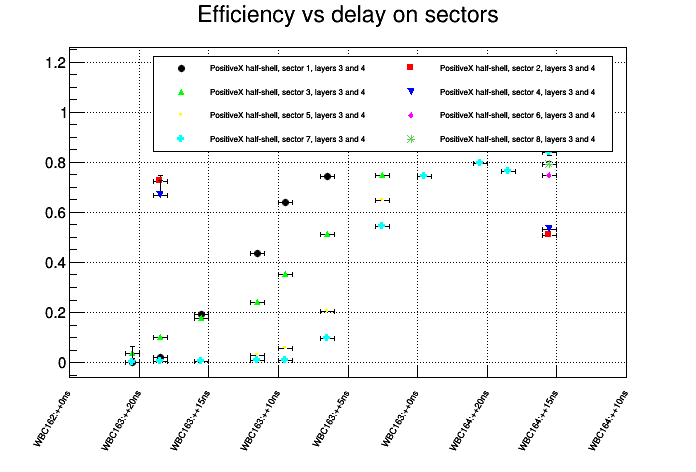

In [51]:
canvases[4].Draw()
canvases[4].SaveAs("plots/" + canvases[4].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/negativeZPositiveXShellLayers1and2canvas.eps has been created


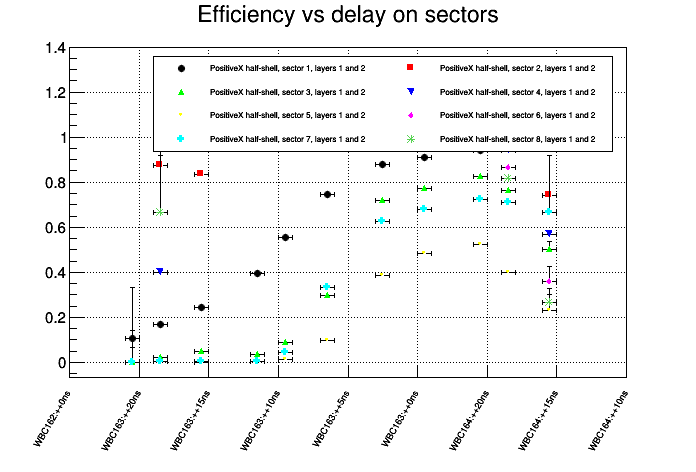

In [52]:
canvases[5].Draw()
canvases[5].SaveAs("plots/" + canvases[5].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/negativeZNegativeXShellLayers3and4canvas.eps has been created


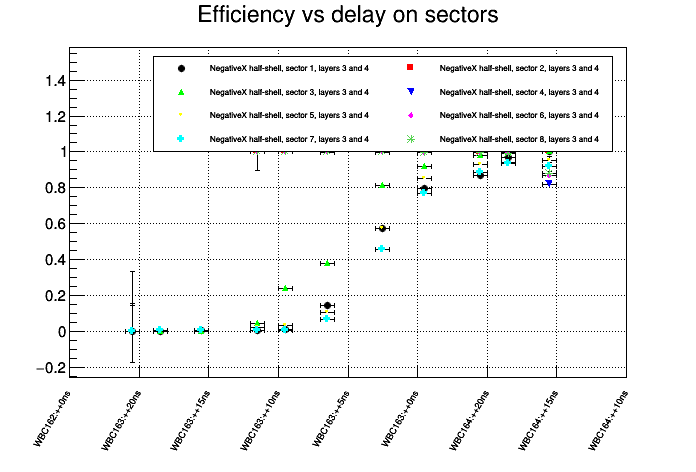

In [53]:
canvases[6].Draw()
canvases[6].SaveAs("plots/" + canvases[6].GetName() + ".eps")

Info in <TCanvas::Print>: eps file plots/negativeZNegativeXShellLayers1and2canvas.eps has been created


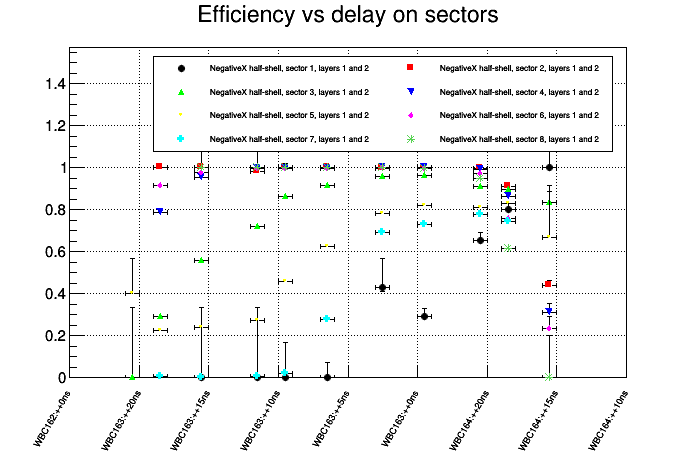

In [55]:
canvases[7].Draw()
canvases[7].SaveAs("plots/" + canvases[7].GetName() + ".eps")